In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score
import seaborn as sns

RDKit WARNING: [16:02:06] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [3]:
df = pd.read_csv("../data/A2a.smi",sep=" ",header=None)
df.columns = ["SMILES","Name","pIC50"]

In [4]:
%time fp_list = fp_list_from_smiles_list(df.SMILES)


CPU times: user 119 ms, sys: 5.24 ms, total: 124 ms
Wall time: 121 ms


In [5]:
df['fp'] = fp_list

In [13]:
train, test = train_test_split(df)

In [14]:
xgb = XGBRegressor(objective='reg:squarederror')

In [15]:
xgb.fit(list(train.fp),train.pIC50)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
pred = xgb.predict(list(test.fp))

In [17]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

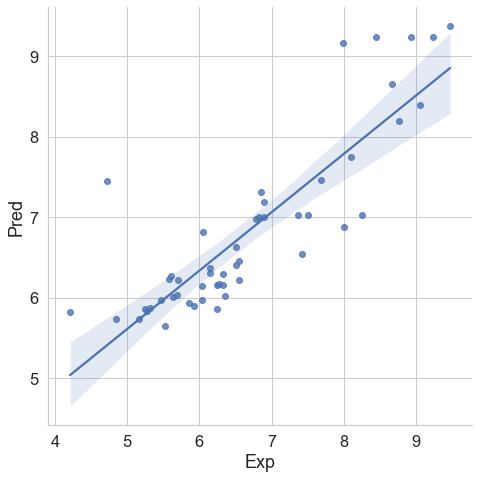

In [18]:
pred_df = pd.DataFrame()
pred_df["Exp"] = test.pIC50
pred_df["Pred"] = pred
ax = sns.lmplot("Exp","Pred",data=pred_df,height=7,aspect=1)

In [19]:
r2_score(test.pIC50,pred)

0.7248101225882282